In [1]:
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd

In [2]:
tickers = ['SBIN.NS', 'HDFCBANK.NS', 'RELIANCE.NS', 'ITC.NS', 'TCS.NS', 'INFY.NS', 'ICICIBANK.NS']

start = dt.datetime(2020, 1, 1)

data = pdr.get_data_yahoo(tickers, start)

data = data['Adj Close']
data

Symbols,SBIN.NS,HDFCBANK.NS,RELIANCE.NS,ITC.NS,TCS.NS,INFY.NS,ICICIBANK.NS
Date,,,,,,,
2020-01-01,326.298218,1258.458008,1480.595825,205.544617,2075.235352,690.363342,531.990540
2020-01-02,331.029968,1266.479614,1505.802124,207.055328,2065.709229,688.348999,535.806335
2020-01-03,325.566467,1248.418701,1507.616577,205.889908,2106.876709,698.936157,534.071838
2020-01-06,311.224762,1221.401001,1472.651367,202.954803,2106.685547,692.237183,521.038513
2020-01-07,310.639374,1240.741455,1495.307617,203.170624,2111.854736,681.978027,518.263306
...,...,...,...,...,...,...,...
2022-11-17,599.049988,1618.150024,2599.050049,343.700012,3349.000000,1587.400024,919.799988
2022-11-18,602.700012,1613.900024,2597.649902,341.049988,3343.449951,1593.400024,920.349976
2022-11-21,598.099976,1597.349976,2550.899902,337.200012,3283.500000,1568.199951,921.400024


In [3]:
log_returns = np.log(data/data.shift())
log_returns

Symbols,SBIN.NS,HDFCBANK.NS,RELIANCE.NS,ITC.NS,TCS.NS,INFY.NS,ICICIBANK.NS
Date,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,0.014397,0.006354,0.016881,0.007323,-0.004601,-0.002922,0.007147
2020-01-03,-0.016642,-0.014363,0.001204,-0.005644,0.019733,0.015263,-0.003242
2020-01-06,-0.045051,-0.021879,-0.023466,-0.014358,-0.000091,-0.009631,-0.024706
2020-01-07,-0.001883,0.015711,0.015268,0.001063,0.002451,-0.014931,-0.005341
...,...,...,...,...,...,...,...
2022-11-17,-0.001168,-0.009074,0.002581,-0.001163,-0.001894,-0.009655,0.006763
2022-11-18,0.006075,-0.002630,-0.000539,-0.007740,-0.001659,0.003773,0.000598
2022-11-21,-0.007662,-0.010308,-0.018161,-0.011353,-0.018093,-0.015942,0.001140


In [6]:
# Monte Carlo Simulation
n = 5000

weights = np.zeros((n, 7))
exp_rtns = np.zeros(n)
exp_vols = np.zeros(n)
sharpe_ratios = np.zeros(n)

for i in range(n):
    weight = np.random.random(7)
    weight /= weight.sum()
    weights[i] = weight
    
    exp_rtns[i] = np.sum(log_returns.mean()*weight)*252
    exp_vols[i] = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))
    sharpe_ratios[i] = exp_rtns[i] / exp_vols[i]

<IPython.core.display.Javascript object>


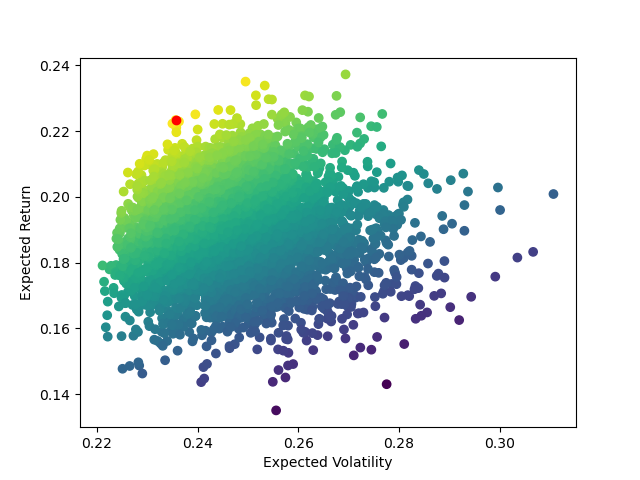

Text(0, 0.5, 'Expected Return')

In [12]:
import matplotlib.pyplot as plt
%matplotlib notebook

fig, ax = plt.subplots()
# ax.set_box_aspect(1)
# ax.set_ylim(0.1, 0.3)
# ax.set_xlim(0.1,0.4)
ax.scatter(exp_vols, exp_rtns, c=sharpe_ratios)
ax.scatter(exp_vols[sharpe_ratios.argmax()], exp_rtns[sharpe_ratios.argmax()], c='r')
ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')

In [13]:
sharpe_ratios.max()

0.9479837380712812

In [14]:
sharpe_ratios.argmax()

2651

In [15]:
weights[3153]

array([0.10342309, 0.11733994, 0.18820423, 0.16456802, 0.16080661,
       0.10273011, 0.162928  ])